In [63]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
MAIN_PATH = 'D:/Master of Applied IT' 
DATA_SUBPATH = '/data'
UNPROCESSED_PATH = MAIN_PATH + DATA_SUBPATH + '/unprocessed/WESAD'
PROCESSED_PATH = MAIN_PATH + DATA_SUBPATH + '/processed/WESAD'

In [65]:
minfolder = 2
maxfolder = 18
folders = [f'S{i}' for i in range(minfolder, maxfolder)]

final_columns = {
    'ACC': ['id','X', 'Y', 'datetime'],
    'EDA': ['id','EDA','datetime'],
    'HR': ['id','HR','datetime'],
    'TEMP': ['id','TEMP','datetime']
}

names = {
    'ACC.csv': ['X', 'Y', 'Z'],
    'EDA.csv': ['EDA'],
    'HR.csv': ['HR'],
    'TEMP.csv': ['TEMP']
}

desired_signals = ['ACC.csv', 'EDA.csv', 'HR.csv', 'TEMP.csv']
acc = pd.DataFrame(columns=final_columns['ACC'])
eda = pd.DataFrame(columns=final_columns['EDA'])
hr = pd.DataFrame(columns=final_columns['HR'])
temp = pd.DataFrame(columns=final_columns['TEMP'])

In [66]:
def process_df(df, file):
    start_timestamp = df.iloc[0, 0]  # Accessing first row, first column
    sample_rate = df.iloc[1, 0]
    new_df = pd.DataFrame(df.iloc[2:].values, columns=df.columns)  # skip first two rows
    new_df['id'] = file[-2:]
    new_df['datetime'] = [(start_timestamp + i/sample_rate) for i in range(len(new_df))]
    if sample_rate > 4:
        ds_factor = int(sample_rate / 4)
        new_df = new_df.iloc[::ds_factor, :]
    return new_df
    

In [67]:
for folder in folders:
    print(f"Currently processing folder: {folder}")
    folder_path = os.path.join(UNPROCESSED_PATH, folder)
    for signal in desired_signals:
        signal_path = os.path.join(folder_path, signal)
        if os.path.isfile(signal_path):
            df = pd.read_csv(signal_path, names=names[signal], header=None)
            if not df.empty:
                if signal == 'ACC.csv':
                    acc = pd.concat([acc, process_df(df, folder)])
                elif signal == 'EDA.csv':
                    eda = pd.concat([eda, process_df(df, folder)])
                elif signal == 'HR.csv':
                    hr = pd.concat([hr, process_df(df, folder)])
                elif signal == 'TEMP.csv':
                    temp = pd.concat([temp, process_df(df, folder)])

Currently processing folder: S2


C:\Users\goert\AppData\Local\Temp\ipykernel_5648\278731602.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  acc = pd.concat([acc, process_df(df, folder)])
C:\Users\goert\AppData\Local\Temp\ipykernel_5648\278731602.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eda = pd.concat([eda, process_df(df, folder)])
C:\Users\goert\AppData\Local\Temp\ipykernel_5648\278731602.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future versi

Currently processing folder: S3
Currently processing folder: S4
Currently processing folder: S5
Currently processing folder: S6
Currently processing folder: S7
Currently processing folder: S8
Currently processing folder: S9
Currently processing folder: S10
Currently processing folder: S11
Currently processing folder: S12
Currently processing folder: S13
Currently processing folder: S14
Currently processing folder: S15
Currently processing folder: S16
Currently processing folder: S17


In [68]:
dataframes = [acc, eda, hr, temp]
filenames = ['combined_acc.csv', 'combined_eda.csv', 'combined_hr.csv', 'combined_temp.csv']

# Create the directory if it doesn't exist
os.makedirs(PROCESSED_PATH, exist_ok=True)

for df, filename in zip(dataframes, filenames):
    print(f"Saving {filename}...")
    df.to_csv(os.path.join(PROCESSED_PATH, filename), index=False)

Saving combined_acc.csv...
Saving combined_eda.csv...
Saving combined_hr.csv...
Saving combined_temp.csv...


In [69]:
signal = "EDA"
eda = pd.read_csv(PROCESSED_PATH + "/combined_" + signal + ".csv")
eda.head()

C:\Users\goert\AppData\Local\Temp\ipykernel_5648\1451237341.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  eda = pd.read_csv(PROCESSED_PATH + "/combined_" + signal + ".csv")


,id,EDA,datetime
0,S2,0.000000,1.495437e+09
1,S2,0.328021,1.495437e+09
2,S2,0.410026,1.495437e+09
3,S2,0.433090,1.495437e+09
4,S2,0.444622,1.495437e+09


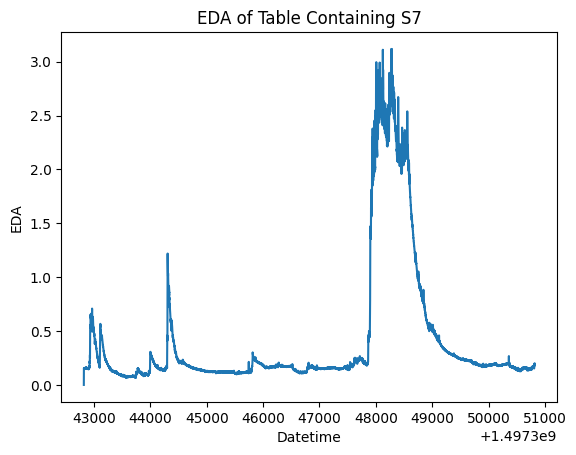

In [74]:
idx = f'S{2}'

data = eda[eda['id'] == idx]
plt.plot(data['datetime'], data['EDA'])
plt.title('EDA of Table Containing' + f'{idx}')
plt.xlabel('Datetime')
plt.ylabel('EDA')
plt.show()
